In [1]:
# import pandas to load the dataset
import os
import pandas as pd
import numpy as np

# read the file
folder = "C:\\Users\\HP\\OneDrive - University of Louisiana Lafayette\\Documents\\Louisiana\\3. Fall 2024\\INFX 595 - Masters Project\\House Price Prediction"
df = pd.read_csv(os.path.join(folder, "Housing_Price_Dataset.csv"))
df.head(10) # prints first 10 rows of the dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [2]:
print(f"Shape of the dataframe: {df.shape}") # prints the shape of the dataframe
print(f"\nThe features of the dataset are the following: \n{df.dtypes}") # prints the features of the dataset and their respective data type

Shape of the dataframe: (545, 13)

The features of the dataset are the following: 
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
# show statistical summary of the numerical variables
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [5]:
# check for missing values
df.isna().max()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [6]:
# check the correlation between the numerical features and price
num_features = df[['area','bedrooms','bathrooms','stories','parking','price']]
num_features.corr()

,area,bedrooms,bathrooms,stories,parking,price
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.535997
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.366494
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.517545
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.420712
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.384394
price,0.535997,0.366494,0.517545,0.420712,0.384394,1.000000


In [7]:
# import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

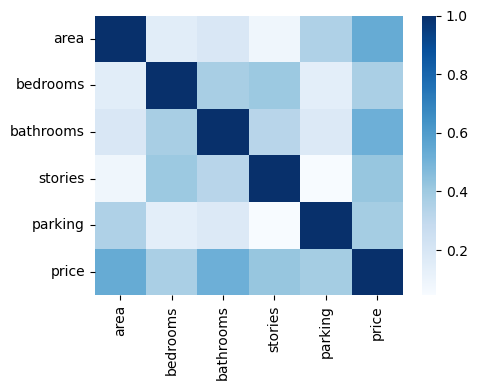

In [8]:
# plot the correlation between the numerical features and price

# create the figure and axes
fig, axes = plt.subplots(figsize=(5,4))

# create heatmap
sns.heatmap(data=num_features.corr(), cmap="Blues", ax=axes)

# show plot
plt.tight_layout()
plt.show()

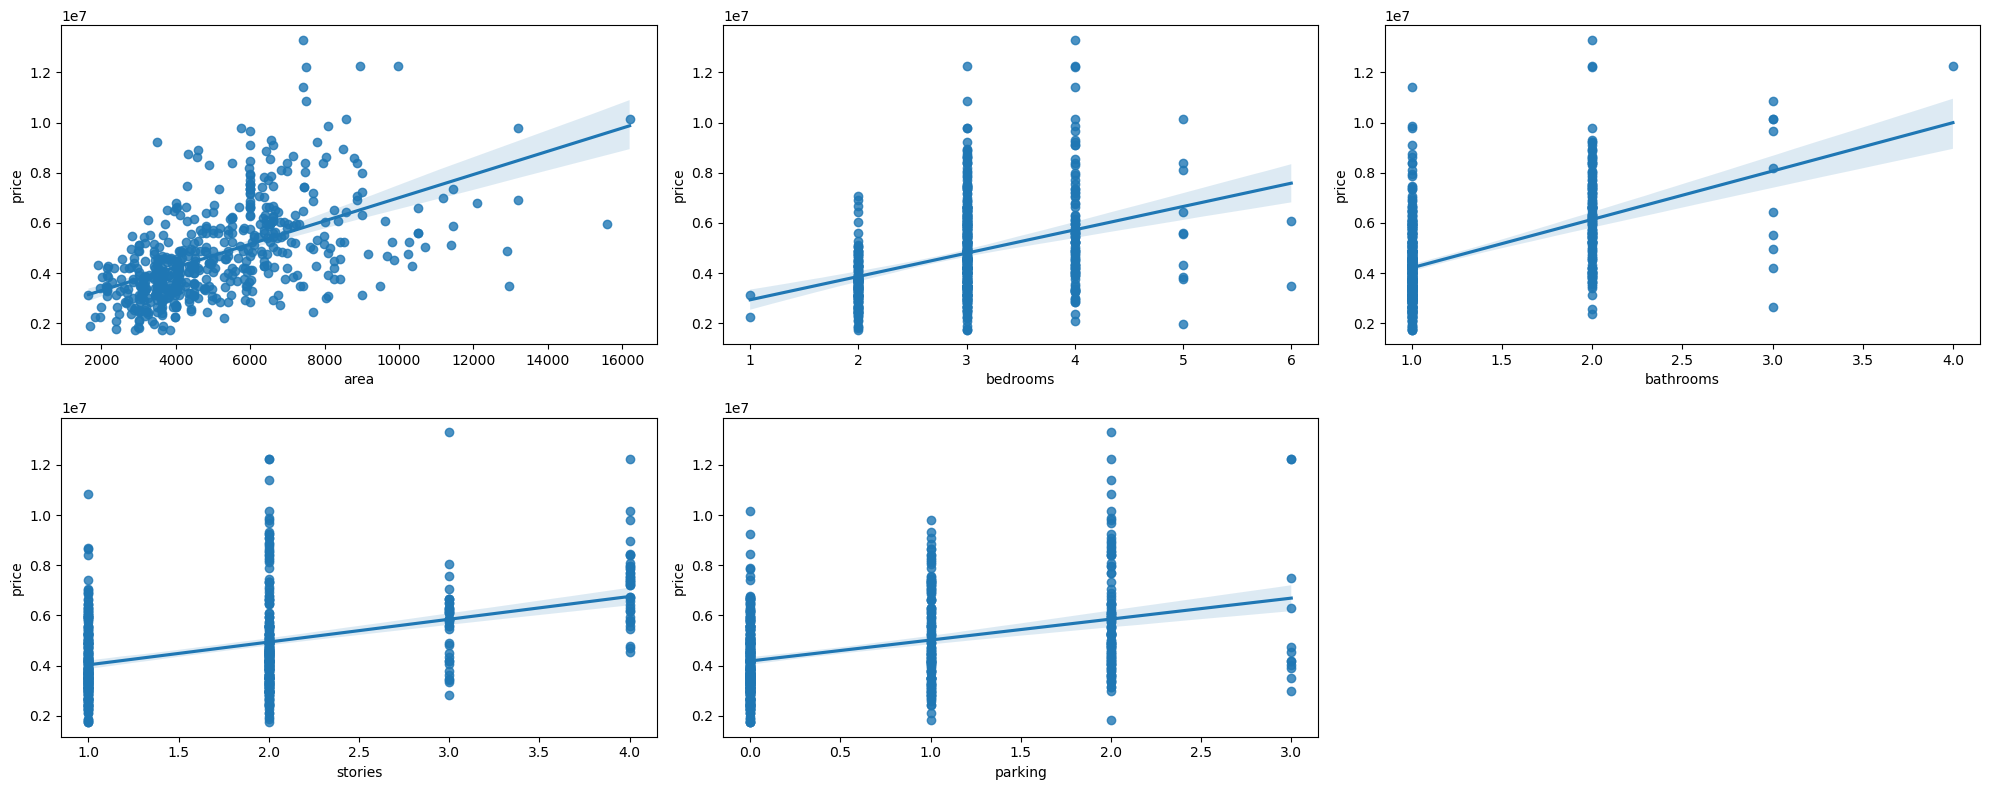

In [9]:
# plot the correlation between the numerical features and price

# create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

# create heatmap
sns.regplot(data=num_features, x="area", y="price", ax=axes[0][0])
sns.regplot(data=num_features, x="bedrooms", y="price", ax=axes[0][1])
sns.regplot(data=num_features, x="bathrooms", y="price", ax=axes[0][2])
sns.regplot(data=num_features, x="stories", y="price", ax=axes[1][0])
sns.regplot(data=num_features, x="parking", y="price", ax=axes[1][1])
axes[1][2].axis('off')

# show plot
plt.tight_layout()
plt.show()

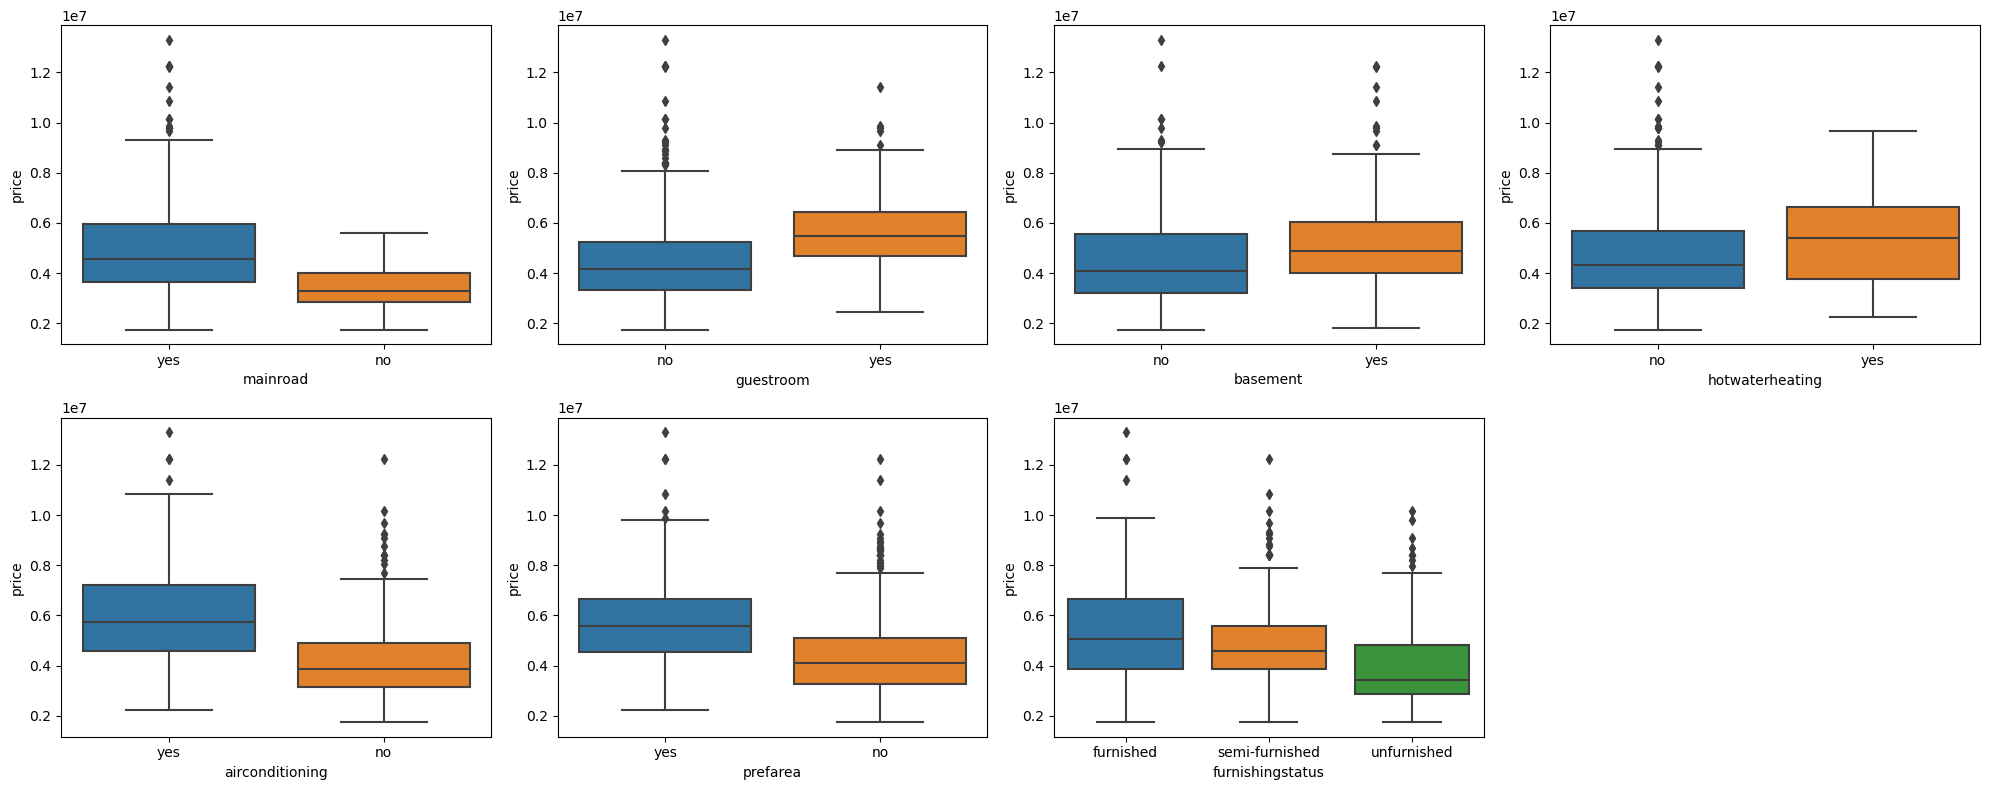

In [10]:
# plot the skewness of the categorical features with respect to price

# create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

# create boxplot
sns.boxplot(data=df, x=df['mainroad'], y=df['price'], ax=axes[0][0]) 
sns.boxplot(data=df, x=df['guestroom'], y=df['price'], ax=axes[0][1]) 
sns.boxplot(data=df, x=df['basement'], y=df['price'], ax=axes[0][2])
sns.boxplot(data=df, x=df['hotwaterheating'], y=df['price'], ax=axes[0][3])
sns.boxplot(data=df, x=df['airconditioning'], y=df['price'], ax=axes[1][0])
sns.boxplot(data=df, x=df['prefarea'], y=df['price'], ax=axes[1][1])
sns.boxplot(data=df, x=df['furnishingstatus'], y=df['price'], ax=axes[1][2])
axes[1][3].axis("off")

# show plots
plt.tight_layout()
plt.show()

In [11]:
# normalize the area feature

# df['area'] = df['area']/df['area'].max()

In [12]:
# hot encode other independent features

# encode bedrooms feature
encoded_bedrooms = pd.get_dummies(df['bedrooms'], dtype=int)
encoded_bedrooms.columns = ['bed#' + str(x) for x in encoded_bedrooms.columns]

# encode bathrooms feature
encoded_bathrooms = pd.get_dummies(df['bathrooms'], dtype=int)
encoded_bathrooms.columns = ['bath#' + str(x) for x in encoded_bathrooms.columns]

# encode stories feature
encoded_stories = pd.get_dummies(df['stories'], dtype=int)
encoded_stories.columns = ['storey#' + str(x) for x in encoded_stories.columns]

# encode parking feature
encoded_parking = pd.get_dummies(df['parking'], dtype=int)
encoded_parking.columns = ['parking#' + str(x) for x in encoded_parking.columns]

# encode mainroad feature
encoded_mainroad = pd.get_dummies(df['mainroad'], dtype=int)
encoded_mainroad.columns = ['mainroad_' + str(x) for x in encoded_mainroad.columns]

# encode guestroom feature
encoded_guestroom = pd.get_dummies(df['guestroom'], dtype=int)
encoded_guestroom.columns = ['guestroom_' + str(x) for x in encoded_guestroom.columns]

# encode basement feature
encoded_basement = pd.get_dummies(df['basement'], dtype=int)
encoded_basement.columns = ['basement_' + str(x) for x in encoded_basement.columns]

# encode hotwaterheating feature
encoded_hotwaterheating = pd.get_dummies(df['hotwaterheating'], dtype=int)
encoded_hotwaterheating.columns = ['waterheater_' + str(x) for x in encoded_hotwaterheating.columns]

# encode airconditioning feature
encoded_airconditioning = pd.get_dummies(df['airconditioning'], dtype=int)
encoded_airconditioning.columns = ['aircondition_' + str(x) for x in encoded_airconditioning.columns]

# encode prefarea feature
encoded_prefarea = pd.get_dummies(df['prefarea'], dtype=int)
encoded_prefarea.columns = ['prefarea_' + str(x) for x in encoded_prefarea.columns]

# encode furnishingstatus feature
encoded_furnishingstatus = pd.get_dummies(df['furnishingstatus'], dtype=int)
encoded_furnishingstatus.columns = [x for x in encoded_furnishingstatus.columns]

In [13]:
# display the updated preprocessed dataset

df = pd.concat([encoded_bedrooms, encoded_bathrooms, encoded_stories, encoded_parking, encoded_mainroad, encoded_guestroom, encoded_basement, encoded_hotwaterheating, encoded_airconditioning, encoded_prefarea, encoded_furnishingstatus, df['area'], df['price']], axis=1)
df.head()

,bed#1,bed#2,bed#3,bed#4,bed#5,bed#6,bath#1,bath#2,bath#3,bath#4,...,waterheater_yes,aircondition_no,aircondition_yes,prefarea_no,prefarea_yes,furnished,semi-furnished,unfurnished,area,price
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,7420,13300000
1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,8960,12250000
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,9960,12250000
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,7500,12215000
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,7420,11410000


In [14]:
# import packages from sklearn to build and evaluate the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
# Separate the predictors from the target
X = df.iloc[:, :-1] # includes all the independent features or predictors
y = df.iloc[:, -1] # includes only the target feature

# Split X and y into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# create an instance of the linear regression model
lr = LinearRegression()

# fit the model with the training data
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# find the intercept
lr.intercept_

5692871.154207632

In [18]:
# find the coefficients of the predictors
lr.coef_

array([-2.89116062e+05, -3.94003124e+05, -8.64231589e+04, -9.61646272e+04,
        2.65381210e+05,  6.00325763e+05, -1.06456618e+06, -1.40234063e+05,
        1.20480025e+06, -7.70029146e-07, -5.94316830e+05, -3.10312982e+05,
        1.20762399e+05,  7.83867413e+05, -2.13511988e+05,  1.05248210e+05,
        3.12986567e+05, -2.04722790e+05, -2.29941560e+05,  2.29941560e+05,
       -1.86237895e+05,  1.86237895e+05, -1.66116891e+05,  1.66116891e+05,
       -5.73914842e+05,  5.73914842e+05, -4.18375593e+05,  4.18375593e+05,
       -3.41236386e+05,  3.41236386e+05,  2.21607902e+05,  8.98165357e+04,
       -3.11424438e+05,  2.44556049e+02])

In [19]:
# use the testing data to check how the model performs
yhat = lr.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


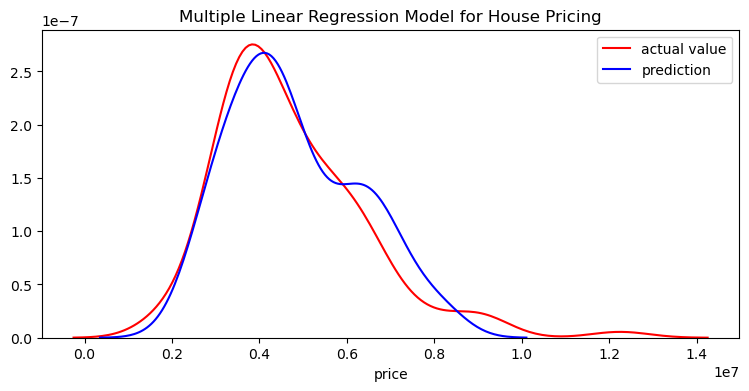

In [20]:
# visualize the multiple linear regression model

# create the figure and axes
fig, axes = plt.subplots(figsize=(9,4))

# plot the multiple linear regression model
sns.kdeplot(y_test, color="r", label="actual value", ax=axes)
sns.kdeplot(yhat, color="b", label="prediction", ax=axes)
axes.set_ylabel("")
axes.legend()

# show title
plt.title("Multiple Linear Regression Model for House Pricing")

# show plots
plt.show()

In [21]:
# evaluate the model

print("**R^2 Score**")
print(f"\nTraining data: {lr.score(X_train, y_train)}")
print(f"Testing data: {lr.score(X_test, y_test)}")


**R^2 Score**

Training data: 0.6885548381905652
Testing data: 0.6105077968021839


In [22]:
# use cross validation to train and test another linear regression model for comparison

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
lr2 = LinearRegression()
cv1 = KFold(n_splits=4, shuffle=True)
cvs = cross_val_score(lr2, X, y, cv=cv1)
for i, score in enumerate(cvs):
    print(f"Score for group {i+1}: {score}")

Score for group 1: 0.5879867715949965
Score for group 2: 0.632912393991006
Score for group 3: 0.6683463726733865
Score for group 4: 0.6876056618833126


In [24]:
average_score = np.mean(cvs)
print(f"Average score: {average_score}")

Average score: 0.6442128000356754


In [25]:
# save the model 
import joblib

filename = 'house_pricing_model.sav'
joblib.dump(lr, open(filename, 'wb')) # saves lr with R^2 score of 0.610

filename2 = 'house_pricing_model2.sav'
joblib.dump(lr2, open(filename2, 'wb')) # saves lr2 with R^2 score of 0.636

# example of how to load the saved model 
# load_model = joblib.load(open(filename, 'rb'))